In [1]:
%matplotlib notebook
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
current_petrol = widgets.BoundedFloatText(
    value=3.49,
    min=0.01,
    max=10.0,
    step=0.01,
    description='Gas Cost:',
    disabled=False
)
annual_miles = widgets.BoundedIntText(
    value=10000,
    min=1000,
    max=20000,
    step=1000,
    description='Annual Miles:',
    disabled=False
)
mpkwh = widgets.FloatSlider(
    value=2.5,
    min=0.1,
    max=6,
    step=0.05,
    description='Miles / kWh:',
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

current_kwh = widgets.BoundedFloatText(
    value=0.23,
    min=0.01,
    max=1.0,
    step=0.001,
    description='$ / kWh:',
    disabled=False
)

In [3]:
def mpge(x):
    return x/33.7

In [4]:
def whpm(x):
    return 1000/x

<IPython.core.display.Javascript object>


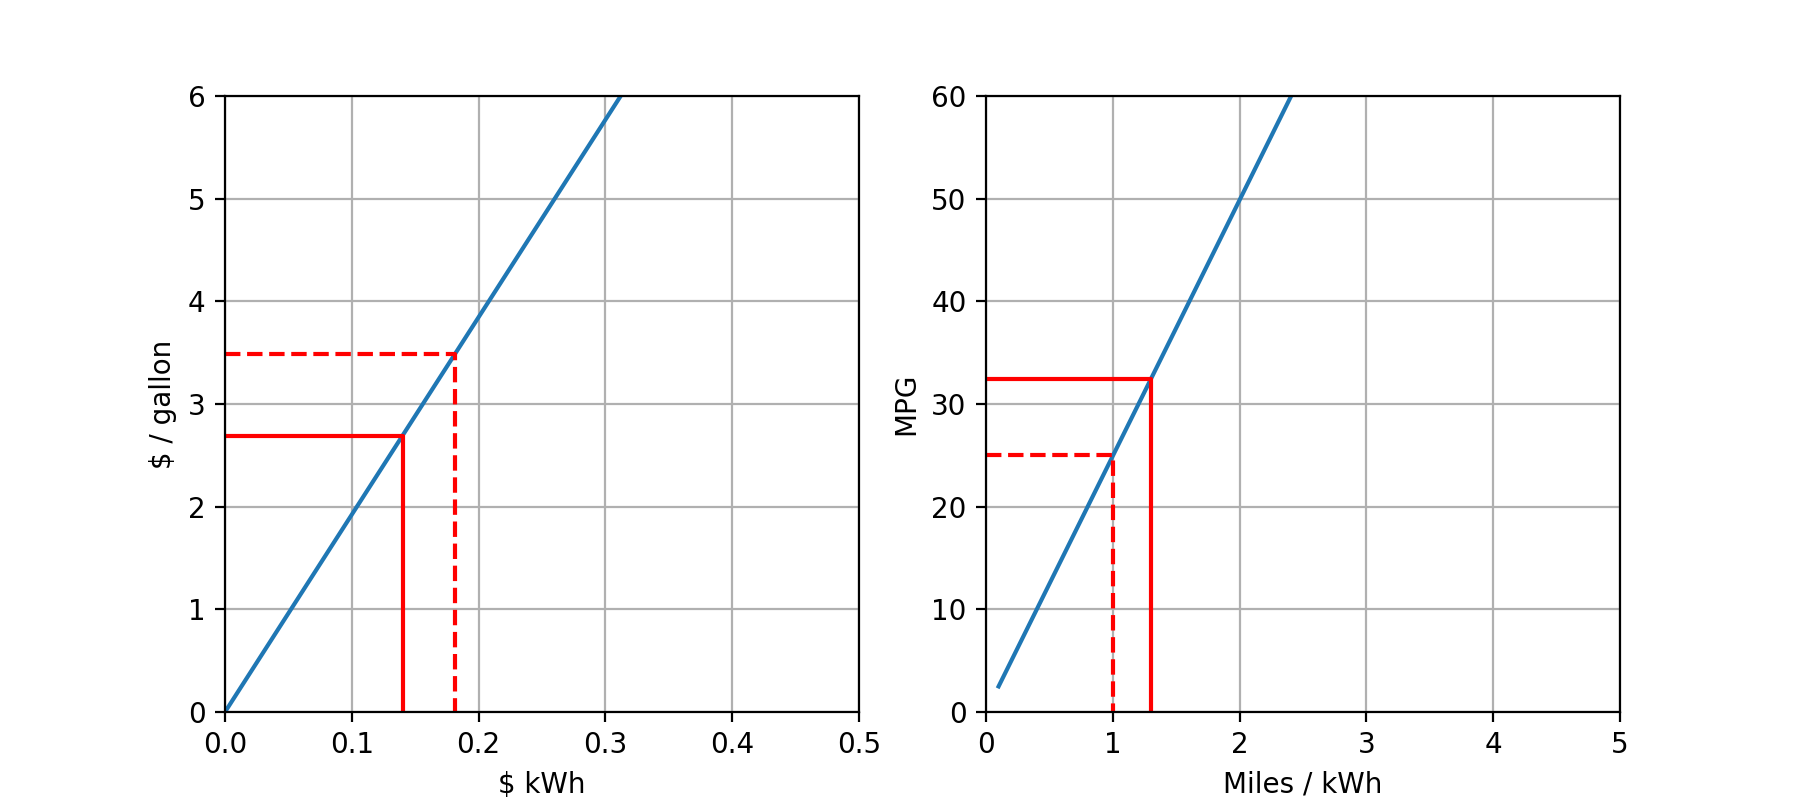

interactive(children=(FloatSlider(value=25.0, description='mpg', max=45.0, min=0.1, step=1.0), FloatSlider(val…

In [7]:
# set up plot
fig, (ax, bx) = plt.subplots(1, 2, figsize=(9, 4))
ax.grid(True)
bx.grid(True)
ax.set_ylim(ymin=0, ymax=6)
ax.set_xlim(xmin=0, xmax=0.5)
ax.set_xlabel('$ kWh')
ax.set_ylabel('$ / gallon')
bx.set_xlabel('Miles / kWh')
bx.set_ylabel('MPG')
bx.set_ylim(ymin=0, ymax=60)
bx.set_xlim(xmin=0, xmax=5)
# generate x values
# x = np.arange(0, 0.5, 0.01)
x = np.array([0, 0.5])
x2 = np.array([0.1, 5.0])

def gas_cost(ec, ee, mpg):
    return (ec / ee)*mpg

def ele_cost(gc, ee, mpg):
#     ee*gc/mpg = ec
    return ee*gc/mpg

def ele_eff(gc, ec, mpg):    
# gc = (ec / ee)*mpg
    return ec*mpg/gc
    
def gas_eff(gc, ec, ee):
    # gc = (ec / ee)*mpg
    return gc*ee/ec

@widgets.interact(mpg=(0.1, 45, 1), mpkwh=mpkwh, current_kwh=current_kwh, current_gas=current_petrol, annual_miles=annual_miles)
def update(mpg = 25, mpkwh=2.5, current_kwh=0.22, current_gas=3.49, annual_miles=10000):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    [l.remove() for l in ax.lines]
    [l.remove() for l in bx.lines]
    [l.remove() for l in bx.lines]
    ax.plot(x, gas_cost(x, mpkwh, mpg), color='C0')
    be = gas_cost(current_kwh, mpkwh, mpg)
    ec = ele_cost(current_gas, mpkwh, mpg)
    ax.plot([0, current_kwh, current_kwh], [be, be, 0], color='r')
    ax.plot([0, ec, ec], [current_gas, current_gas, 0], color='r', linestyle='dashed')
    #
    bx.plot(x2, gas_eff(current_gas, current_kwh, x2), color='C0')
    mpgec = gas_eff(current_gas, current_kwh, mpkwh)
    eee = ele_eff(current_gas, current_kwh, mpgec)
    bx.plot([0, eee, eee], [mpgec, mpgec, 0], color='r')
    e4 = ele_eff(current_gas, current_kwh, mpg)
    bx.plot([0, e4, e4], [mpg, mpg, 0], color='r', linestyle='dashed')
    
    print(f"Electicity is cheaper unless gas is below ${be:.2f} per gallon")
    annual_gas_cost = annual_miles*current_gas / mpg
    annual_electric_cost = annual_miles * current_kwh / mpkwh
    print(f"Gas Cost: ${annual_gas_cost:.2f} vs. ${annual_electric_cost:.2f}")
    print(f"Savings by going Electric: ${annual_gas_cost - annual_electric_cost:.2f}")
    print(f"{mpkwh:.2f} miles /kWh == {mpkwh*33.7:.2f} MPGe == {1000/mpkwh:.2f} Wh / mile")